# <center><font color="black">线性回归</font></center>

### 前奏

##### y=x**2

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(x):
    return x**2
def gradient(x):
    return 2*x

X=[]
Y=[]
x=2
times=0
alpha=0.8
X.append(x)
Y.append(f(x))
while times<50000:
    f_current=f(x)
    x_new=x-alpha*gradient(x)
    f_new=f(x_new)
    if abs(f_new-f_current)<0.01:
        break
    x=x_new
    X.append(x)
    Y.append(f(x))
    times+=1

Text(0.5,1,'$y=x^2$函数求解的最小值，最终解是：x=0,y=0')

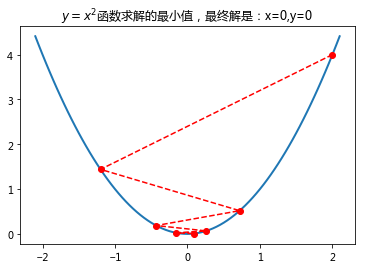

In [17]:
X2=np.arange(-2.1,2.15,0.05)
Y2=X2**2
plt.plot(X2,Y2,linewidth=2)
plt.plot(X,Y,'ro--')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.title('$y=x^2$函数求解的最小值，最终解是：x=%i,y=%i'%(x,f(x)))

##### 看一下alpha变化的影响

Text(0.5,1,'alpha=0.05')

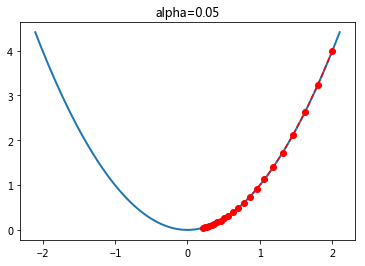

In [68]:
def f(x):
    return x**2
def gradient(x):
    return 2*x

X=[]
Y=[]
x=2
times=0
alpha=0.05
X.append(x)
Y.append(f(x))
while times<50000000:
    f_current=f(x)
    x_new=x-alpha*gradient(x)
    f_new=f(x_new)
    if abs(f_new-f_current)<0.01:
        break
    x=x_new
    X.append(x)
    Y.append(f(x))
    times+=1
X2=np.arange(-2.1,2.15,0.05)
Y2=X2**2
plt.plot(X2,Y2,linewidth=2)
plt.plot(X,Y,'ro--')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.title('alpha=0.05')

##### y=x^2+y^2

In [22]:
def f(x,y):
    return x**2+y**2
def gradient(t):
    return 2*t

X=[]
Y=[]
Z=[]
x=2
y=2
times=0
alpha=0.1
X.append(x)
Y.append(y)
Z.append(f(x,y))
while times<50000:
    f_current=f(x,y)
    x_new=x-alpha*gradient(x)
    y_new=y-alpha*gradient(y)
    f_new=f(x_new,y_new)
    if abs(f_new-f_current)<0.01:
        break
    x=x_new
    y=y_new
    X.append(x)
    Y.append(y)
    Z.append(f(x,y))
    times+=1
print(x,y)

0.10995116277760002 0.10995116277760002


Text(0.5,0.92,'函数$z=x^2+y^2$梯度下降法求解的最小值是：x=0,y=0，z=0')

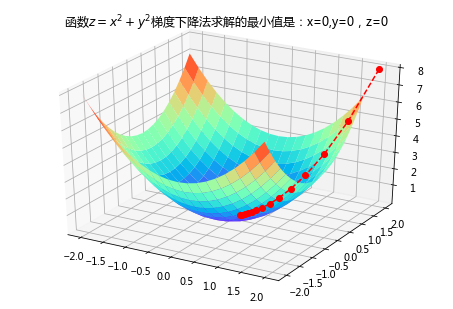

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
X2=np.arange(-2,2,0.2)
Y2=np.arange(-2,2,0.2)
X2,Y2=np.meshgrid(X2,Y2)
Z2=X2**2+Y2**2

ax.plot_surface(X2,Y2,Z2,rstride=1,cstride=1,cmap='rainbow')
ax.plot(X,Y,Z,'ro--')
ax.set_title(u'函数$z=x^2+y^2$梯度下降法求解的最小值是：x=%i,y=%i，z=%i'%(x,y,f(x,y)))

### 线性回归

- [回归：原理出发](#回归：原理出发)
- [线性回归：房价预测案例](#线性回归：房价预测案例)
- [最小二乘和梯度下降法比较](#最小二乘和梯度下降法比较)

课件中一开始的案例

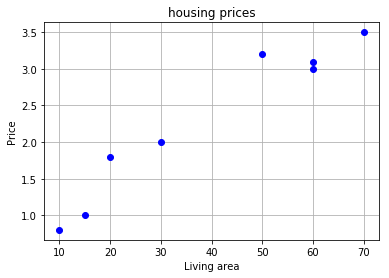

In [2]:
import matplotlib.pyplot as plt
X=[10,15,20,30,50,60,60,70]
Y=[0.8,1,1.8,2,3.2,3,3.1,3.5]
plt.plot(X,Y,'bo')
plt.xlabel('Living area')
plt.ylabel('Price')
plt.title('housing prices')
plt.grid(True)

Text(0.5,1,'housing prices')

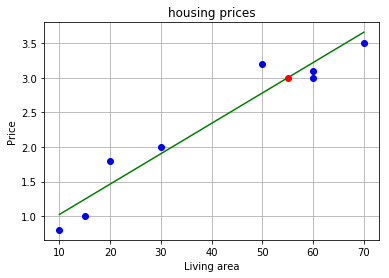

In [16]:
X=[10,15,20,30,50,60,60,70]
Y=[0.8,1,1.8,2,3.2,3,3.1,3.5]
plt.plot(X,Y,'bo')
x=[min(X),max(X)]
y=[w*x[0]+b,w*x[1]+b]
plt.plot(x,y,'g-')
plt.plot(55,reg.predict(55),'ro')
plt.grid(True)
plt.xlabel('Living area')
plt.ylabel('Price')
plt.title('housing prices')

#### 原理实现1

##### data是最开始的例子：一元函数的房价信息

In [3]:
f = open('C:\\Users\\Administrator\\Desktop\\data.txt')
data=[]
for line in f:
    d=list(map(float,line.strip().split('\t')))
    data.append(d)
f.close()

In [5]:
M=len(data)
N=len(data[0])

def f(w,x):
    y=0
    for i in range(0,N-1):
        y+=w[i]*x[i]
    y+=w[N-1]
    return y

def grad(data,w,j):
    g=0
    for i in range(M):
        y=f(w,data[i])
        if j!=N-1:
            g+=(data[i][N-1]-y)*data[i][j]
        else:
            g+=data[i][N-1]-y
    return g

def loss(data,w):
    l=0
    for i in range(M):
        y=f(w,data[i])
        l+=(data[i][N-1]-y)**2
    return l/2


flag=0
w=[0 for i in range(N)]
wNew=[0 for i in range(N)]
g=[0 for i in range(N)]
times=0
alpha=0.00001
while times<10000:
    for j in range(N):
        g[j]=grad(data,w,j)
        wNew[j]+=alpha*g[j]
        #print('times,loss,w,g:\t',times,loss(data,w),w,g)        
        if abs(wNew[j]-w[j])<0.0000001:
            flag=1
            break            
        else:
            w[j]=wNew[j]
    if flag:
        break    
    times+=1
print(w)
w[0]*55+w[1]

[0.05572566998072889, 0.001792119310326635]


3.066703968250416

In [58]:
#预测值
import numpy as np
w=np.array(w)
data=np.array(data)
print(np.dot(data,w))

[0.5586904  0.83767717 1.11773921 1.67535434 2.79201828 3.34891656
 3.90706932]


#### 回归：原理出发2（data是较长的那个数据txt）

####  方法一：梯度下降法

（1）传统做法

1.一个简单案例示范

[[0.067732, 3.176513],
 [0.42781, 3.816464],
 [0.995731, 4.550095],
 [0.738336, 4.256571],
 [0.981083, 4.560815],
 [0.526171, 3.929515],
 [0.378887, 3.52617],
 [0.033859, 3.156393],
 [0.132791, 3.110301],
 [0.138306, 3.149813],
 [0.247809, 3.476346],
 [0.64827, 4.119688],
 [0.731209, 4.282233],
 [0.236833, 3.486582],
 [0.969788, 4.655492],
 [0.607492, 3.965162],
 [0.358622, 3.5149],
 [0.147846, 3.125947],
 [0.63782, 4.094115],
 [0.230372, 3.476039],
 [0.070237, 3.21061],
 [0.067154, 3.190612],
 [0.925577, 4.631504],
 [0.717733, 4.29589],
 [0.015371, 3.085028],
 [0.33507, 3.44808],
 [0.040486, 3.16744],
 [0.212575, 3.364266],
 [0.617218, 3.993482],
 [0.541196, 3.891471],
 [0.045353, 3.143259],
 [0.126762, 3.114204],
 [0.556486, 3.851484],
 [0.901144, 4.621899],
 [0.958476, 4.580768],
 [0.274561, 3.620992],
 [0.394396, 3.580501],
 [0.87248, 4.618706],
 [0.409932, 3.676867],
 [0.908969, 4.641845],
 [0.166819, 3.175939],
 [0.665016, 4.26498],
 [0.263727, 3.558448],
 [0.231214, 3.436632],
 

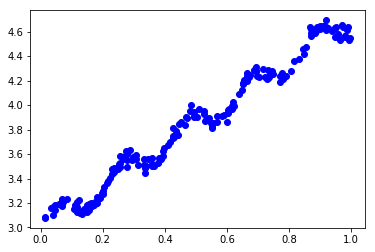

In [46]:
f = open('G:/代码/新建文件夹/回归代码/data.txt')
data=[]
for line in f:
    d = list(map(float,line.split('\t')))
    data.append(d)
f.close()
x=[]
y=[]
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])
import matplotlib.pyplot as plt
plt.plot(x,y,'bo')
data

In [57]:
M=len(data)
N=len(data[0])

#回归函数
def f(x,w):
    y=0
    for i in range(N-1):
        y += w[i]*x[i]
    y+=w[N-1]  
    return y

# 梯度函数
def gradient(data,w,j):
    g=0
    for i in range(M):
        h = f(data[i],w)
        if j!=N-1:
            g += (h-data[i][N-1])*data[i][j]
        else:
            g += (h-data[i][N-1])
    return g

#目标函数（损失函数）
def loss(data,w):
    l=0
    for i in range(M):
        h = f(data[i],w)
        l+=(h-data[i][N-1])**2
    return l/2

w=[0 for i in range(N)]
wNew=[0 for i in range(N)]
g=[0 for i in range(N)]
alpha=0.001
times=0
while times<1000000:
    flag=0
    for j in range(N):
        g[j]=gradient(data,w,j)
        wNew[j] = w[j]- alpha*g[j]        
        #print('times,loss,w:\t',times,loss(data,w),w)
        if abs(wNew[j]-w[j])<0.000001:
            flag=1
            break
        else:
            w[j]=wNew[j]
            times+=1
    if flag:
        break
        
print(w)

[1.6951899067210519, 3.0078130018142923]


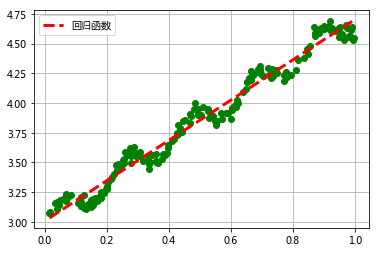

In [92]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])
plt.plot(x,y,'go')
X=[min(x),max(x)]
Y=[w[0]*X[0]+w[1],w[0]*X[1]+w[1]]
plt.plot(X,Y,'r--',linewidth=3,label='回归函数')
plt.grid(True)
plt.legend()
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

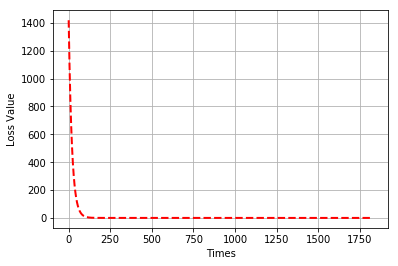

In [4]:
#绘制损失函数
plt.plot(LossFunction,'r--',linewidth=2)
plt.xlabel('Times')
plt.ylabel('Loss Value')
plt.grid(True)

和上边的一样，稍有修饰

In [2]:
#回归函数
def f(w,x):
    y=0
    for i in range(len(w)-1):
        y+=w[i]*x[i]
    y+=w[N-1]
    return y

#梯度方向
def gradient(data,w,j):
    g=0
    for i in range(M-1):
        y=f(w,data[i])
        if j!=N-1:
            g+=(data[i][N-1]-y)*data[i][j]
        else:
            g+=data[i][N-1]-y
    return g

#目标函数
def fw(w,data):
    h=0
    for i in range(M-1):
        y=f(w,data[i])
        h+=(y-data[i][N-1])**2
    return h/2

#存放每次w的值，利于画图        
def assign(a):
    L=[]
    for x in a:
        L.append(x)
    return L

#判断w与wNew比较大小
def isSame(a, b):
    n = len(a)
    i = 0
    while i < n:
        if abs(a[i] - b[i]) > 0.00001:
            return False
        i += 1
    return True

        
def calcCofficient(data,W,LossFunction):
    w=[0 for i in range(N)]
    wNew=[0 for i in range(N)]
    g=[0 for i in range(N)]
    times=0
    a=0.0001
    while times < 10000:
        for j in range(N):
            g[j]=gradient(data,w,j)
            wNew[j]+=g[j]*a                
        print("times,fw,w,g:\t", times, fw(w, data), w, g)
        if isSame(w, wNew):
            break
        for i in range(N):
            w[i]=wNew[i]
        times+=1


        W.append(assign(w))
        LossFunction.append(fw(w,data))
        
    return w
    
if __name__=="__main__":
    filedata=open('G:\\代码\\新建文件夹\\回归代码\\data.txt')
    data=[]
    for line in filedata:
        d=list(map(float,line.split('\t')))
        data.append(d)
    filedata.close()
    M=len(data)
    N=len(data[0])
    
    W=[]
    LossFunction=[]
    w=calcCofficient(data,W,LossFunction)    

times,fw,w,g:	 0 1491.5063923914709 [0, 0] [403.1874350352099, 763.9910169999996]
times,fw,w,g:	 1 1417.8160284069256 [0.04031874350352099, 0.07639910169999996] [393.1240473995803, 744.854597606123]
times,fw,w,g:	 2 1347.7682513666655 [0.07963114824347903, 0.15088456146061224] [383.31249636902396, 726.1971589265904]
times,fw,w,g:	 3 1281.1830042398615 [0.11796239788038143, 0.22350427735327127] [373.74647883469174, 708.0067126386145]
times,fw,w,g:	 4 1217.8891304114181 [0.1553370457638506, 0.29430494861713274] [364.41984944670406, 690.2715704723659]
times,fw,w,g:	 5 1157.7239337246936 [0.191779030708521, 0.36333210566436935] [355.3266166656355, 672.9803367010236]
times,fw,w,g:	 6 1100.532760271799 [0.22731169237508456, 0.4306301393344717] [346.4609389128316, 656.1219008187793]
times,fw,w,g:	 7 1046.1686008564466 [0.26195778626636773, 0.4962423294163496] [337.8171208170742, 639.685430402111]
times,fw,w,g:	 8 994.4917131075107 [0.29573949834807517, 0.5602108724565606] [329.3896095551912, 

times,fw,w,g:	 112 5.823403079776833 [1.524497625286412, 2.8698007972151793] [24.526472750798145, 44.18951739537835]
times,fw,w,g:	 113 5.571171898128421 [1.5269502725614919, 2.874219748954717] [23.936593546364687, 43.07089605313186]
times,fw,w,g:	 114 5.331402662328929 [1.5293439319161284, 2.87852683856003] [23.361445985087425, 41.98028940784679]
times,fw,w,g:	 115 5.103479381242213 [1.5316800765146372, 2.882724867500815] [22.800661395624438, 40.916996263355784]
times,fw,w,g:	 116 4.8868165128027785 [1.5339601426541998, 2.88681656712715] [22.253880333963757, 39.880332973597014]
times,fw,w,g:	 117 4.680857458885062 [1.5361855306875962, 2.89080460042451] [21.72075235247504, 38.86963300335654]
times,fw,w,g:	 118 4.485073134573016 [1.5383576059228437, 2.8946915637248454] [21.200935774741218, 37.88424650000515]
times,fw,w,g:	 119 4.298960608152176 [1.5404776995003178, 2.898479988374846] [20.69409747602588, 36.92353987595357]
times,fw,w,g:	 120 4.122041808328482 [1.5425471092479204, 2.90217

times,fw,w,g:	 195 0.7895163148824796 [1.614942857058281, 3.0225013883235166] [3.7741198956665967, 4.97938112755613]
times,fw,w,g:	 196 0.7856601071589429 [1.6153202690478476, 3.0229993264362722] [3.7011079375693687, 4.8434757953600505]
times,fw,w,g:	 197 0.7819896250835677 [1.6156903798416047, 3.023483674015808] [3.6298944920039844, 4.710987193673199]
times,fw,w,g:	 198 0.7784957011991565 [1.616053369290805, 3.0239547727351757] [3.5604345833235804, 4.58182978549365]
times,fw,w,g:	 199 0.7751696211705024 [1.6164094127491373, 3.024412955713725] [3.4926843615138976, 4.455920174732716]
times,fw,w,g:	 200 0.77200310138617 [1.6167586811852888, 3.024858547731198] [3.4266010740200263, 4.333177052630274]
times,fw,w,g:	 201 0.7689882676674507 [1.6171013412926907, 3.0252918654364613] [3.36214303827855, 4.213521145511688]
times,fw,w,g:	 202 0.766117635029741 [1.6174375555965186, 3.0257132175510124] [3.299269614937005, 4.096875163852015]
times,fw,w,g:	 203 0.7633840884443536 [1.6177674825580124, 3

times,fw,w,g:	 267 0.708736526257734 [1.6307746946703408, 3.037514773313633] [1.2844107652634476, 0.44735916609880677]
times,fw,w,g:	 268 0.7085528358996653 [1.630903135746867, 3.0375595092302428] [1.2717296945419627, 0.42592759518458223]
times,fw,w,g:	 269 0.7083741973541183 [1.6310303087163214, 3.037602101989761] [1.259339799864265, 0.405046213379864]
times,fw,w,g:	 270 0.7082003717469224 [1.6311562426963078, 3.037642606611099] [1.2472338287583777, 0.38470123156794855]
times,fw,w,g:	 271 0.708031131982532 [1.6312809660791836, 3.037681076734256] [1.2354047102251218, 0.3648792057815564]
times,fw,w,g:	 272 0.7078662621618772 [1.631404506550206, 3.0377175646548342] [1.2238455501962624, 0.3455670285643624]
times,fw,w,g:	 273 0.7077055570289901 [1.6315268911052256, 3.037752121357691] [1.212549627106182, 0.32675192054845414]
times,fw,w,g:	 274 0.707548821444978 [1.6316481460679362, 3.0377847965497455] [1.2015103875743878, 0.3084214222426205]
times,fw,w,g:	 275 0.7073958698880068 [1.63176829

times,fw,w,g:	 359 0.6997507362651272 [1.6395598827836828, 3.036945709276361] [0.7710377285025981, -0.29637143154107237]
times,fw,w,g:	 360 0.6996825597156224 [1.639636986556533, 3.0369160721332067] [0.7689359154640958, -0.2979949308986911]
times,fw,w,g:	 361 0.6996146096464897 [1.6397138801480795, 3.0368862726401167] [0.7668635495453682, -0.29956561992958486]
times,fw,w,g:	 362 0.699546883323869 [1.6397905665030341, 3.036856316078124] [0.7648199249096427, -0.30108483680898646]
times,fw,w,g:	 363 0.6994793781262585 [1.6398670484955251, 3.036826207594443] [0.762804353344427, -0.3025538861970354]
times,fw,w,g:	 364 0.6994120915390332 [1.6399433289308596, 3.036795952205823] [0.7608161638203423, -0.3039740400779065]
times,fw,w,g:	 365 0.6993450211492106 [1.6400194105472417, 3.0367655548018155] [0.7588547020611304, -0.30534653857759153]
times,fw,w,g:	 366 0.6992781646404967 [1.6400952960174477, 3.0367350201479577] [0.7569193301245069, -0.30667259076112385]
times,fw,w,g:	 367 0.6992115197885

times,fw,w,g:	 472 0.693171594623705 [1.6473452765032888, 3.0332631093323665] [0.6261243380311847, -0.3229808031483845]
times,fw,w,g:	 473 0.6931219932531548 [1.6474078889370918, 3.033230811252052] [0.6252204781891721, -0.32266118013006473]
times,fw,w,g:	 474 0.693072525531013 [1.6474704109849108, 3.033198545134039] [0.6243193534346001, -0.3223391006706229]
times,fw,w,g:	 475 0.69302319109064 [1.6475328429202543, 3.033166311223972] [0.6234209220944221, -0.32201464033340343]
times,fw,w,g:	 476 0.6929739895667234 [1.6475951850124637, 3.0331341097599385] [0.6225251435026087, -0.3216878727714043]
times,fw,w,g:	 477 0.6929249205952591 [1.647657437526814, 3.0331019409726614] [0.6216319779748224, -0.3213588697754526]
times,fw,w,g:	 478 0.6928759838135305 [1.6477196007246115, 3.0330698050856837] [0.6207413867841209, -0.3210277013203968]
times,fw,w,g:	 479 0.6928271788600924 [1.6477816748632899, 3.0330377023155517] [0.6198533321368314, -0.32069443561101085]
times,fw,w,g:	 480 0.6927785053747493

times,fw,w,g:	 589 0.6881877405443682 [1.6541091316944339, 3.0297304334127464] [0.5327358281762945, -0.2797763860503606]
times,fw,w,g:	 590 0.6881515566968099 [1.6541624052772514, 3.0297024557741414] [0.5320152557219153, -0.2794055480863564]
times,fw,w,g:	 591 0.6881154702432415 [1.6542156068028235, 3.029674515219333] [0.5312957318898194, -0.279035060783817]
times,fw,w,g:	 592 0.6880794809214946 [1.6542687363760125, 3.0296466117132548] [0.5305772533102744, -0.2786649273936588]
times,fw,w,g:	 593 0.6880435884701083 [1.6543217941013435, 3.029618745220515] [0.5298598166671348, -0.2782951510691274]
times,fw,w,g:	 594 0.6880077926283269 [1.6543747800830102, 3.029590915705408] [0.5291434186964054, -0.27792573486854044]
times,fw,w,g:	 595 0.687972093136098 [1.65442769442488, 3.029563123131921] [0.5284280561851091, -0.27755668175741244]
times,fw,w,g:	 596 0.6879364897340682 [1.6544805372304985, 3.0295353674637453] [0.5277137259699721, -0.2771879946109661]
times,fw,w,g:	 597 0.6879009821635829 

times,fw,w,g:	 694 0.6848742615307764 [1.6593278360638806, 3.02698778365936] [0.46233820395189873, -0.2430613645676054]
times,fw,w,g:	 695 0.684846996358288 [1.6593740698842758, 3.0269634775229033] [0.4617153441792093, -0.24273444334172645]
times,fw,w,g:	 696 0.6848198045736245 [1.6594202414186938, 3.026939204078569] [0.4610933286887939, -0.24240795199837972]
times,fw,w,g:	 697 0.6847926859792511 [1.6594663507515628, 3.026914963283369] [0.46047215620695553, -0.2420818902185915]
times,fw,w,g:	 698 0.6847656403781693 [1.6595123979671835, 3.0268907550943474] [0.4598518254650547, -0.24175625767747722]
times,fw,w,g:	 699 0.6847386675739051 [1.65955838314973, 3.0268665794685794] [0.4592323351995732, -0.24143105404408471]
times,fw,w,g:	 700 0.6847117673705175 [1.65960430638325, 3.026842436363175] [0.45861368415184806, -0.24110627898191428]
times,fw,w,g:	 701 0.6846849395725915 [1.659650167751665, 3.026818325735277] [0.45799587106820977, -0.24078193214865085]
times,fw,w,g:	 702 0.6846581839852

times,fw,w,g:	 794 0.6824810544621965 [1.663656085537624, 3.0247122005424445] [0.4040406417370893, -0.21243083281154096]
times,fw,w,g:	 795 0.6824602309235244 [1.6636964896017976, 3.024690957459163] [0.4034964935873023, -0.21214478022390004]
times,fw,w,g:	 796 0.6824394634341643 [1.6637368392511565, 3.024669742981141] [0.40295307868743335, -0.21185911204620123]
times,fw,w,g:	 797 0.6824187518432517 [1.663777134559025, 3.0246485570699364] [0.40241039603920736, -0.21157382778128309]
times,fw,w,g:	 798 0.6823980960003299 [1.663817375598629, 3.024627399687158] [0.40186844464592164, -0.21128892693219736]
times,fw,w,g:	 799 0.6823774957553447 [1.6638575624430936, 3.024606270794465] [0.4013272235124418, -0.2110044090022547]
times,fw,w,g:	 800 0.6823569509586461 [1.6638976951654447, 3.0245851703535647] [0.40078673164528617, -0.2107202734948319]
times,fw,w,g:	 801 0.6823364614609903 [1.6639377738386092, 3.024564098326215] [0.40024696805254995, -0.21043651991352652]
times,fw,w,g:	 802 0.68231602

times,fw,w,g:	 894 0.6806532633481236 [1.667438615128057, 3.02272346500131] [0.35309980727746365, -0.18564928355508759]
times,fw,w,g:	 895 0.6806373595513057 [1.6674739251087847, 3.0227049000729544] [0.35262427825574716, -0.18539926799485285]
times,fw,w,g:	 896 0.6806214985616632 [1.6675091875366101, 3.022686360146155] [0.3521493896742858, -0.185149589070992]
times,fw,w,g:	 897 0.680605680263975 [1.6675444024755777, 3.022667845187248] [0.3516751406696557, -0.18490024633190139]
times,fw,w,g:	 898 0.6805899045433306 [1.6675795699896447, 3.022649355162615] [0.35120153037975105, -0.18465123932630645]
times,fw,w,g:	 899 0.6805741712851265 [1.6676146901426827, 3.0226308900386822] [0.35072855794356483, -0.18440256760366003]
times,fw,w,g:	 900 0.6805584803750719 [1.667649762998477, 3.022612449781922] [0.3502562225012859, -0.18415423071395143]
times,fw,w,g:	 901 0.6805428316991786 [1.667684788620727, 3.0225940343588507] [0.3497845231942979, -0.18390622820769842]
times,fw,w,g:	 902 0.68052722514

times,fw,w,g:	 993 0.6792694829268715 [1.6707133525836286, 3.0210017055208147] [0.30899811274431654, -0.16246204752294213]
times,fw,w,g:	 994 0.6792573037583253 [1.670744252394903, 3.0209854593160625] [0.3085819777515651, -0.16224325635082515]
times,fw,w,g:	 995 0.679245157371623 [1.6707751105926782, 3.0209692349904276] [0.30816640318018834, -0.1620247598245257]
times,fw,w,g:	 996 0.6792330436785298 [1.6708059272329963, 3.020953032514445] [0.30775138827543136, -0.16180655754726958]
times,fw,w,g:	 997 0.679220962591044 [1.6708367023718238, 3.02093685185869] [0.30733693228344666, -0.16158864912304383]
times,fw,w,g:	 998 0.679208914021408 [1.6708674360650522, 3.0209206929937777] [0.306923034451492, -0.16137103415618714]
times,fw,w,g:	 999 0.6791968978820915 [1.6708981283684974, 3.020904555890362] [0.3065096940278087, -0.16115371225162356]
times,fw,w,g:	 1000 0.679184914085806 [1.6709287793379002, 3.020888440519137] [0.3060969102616418, -0.16093668301484376]
times,fw,w,g:	 1001 0.679172962

times,fw,w,g:	 1093 0.6782004534791255 [1.673606120430278, 3.0194807738773006] [0.2700405372350132, -0.14197931829386157]
times,fw,w,g:	 1094 0.6781911517449177 [1.6736331244840015, 3.0194665759454713] [0.2696768674099367, -0.14178811148997594]
times,fw,w,g:	 1095 0.6781818750475606 [1.6736600921707425, 3.019452397134322] [0.2693136873476388, -0.14159716218823526]
times,fw,w,g:	 1096 0.6781726233196628 [1.6736870235394772, 3.0194382374181035] [0.2689509963884953, -0.14140647004196083]
times,fw,w,g:	 1097 0.678163396494015 [1.6737139186391161, 3.0194240967710995] [0.2685887938738217, -0.1412160347048257]
times,fw,w,g:	 1098 0.678154194503592 [1.6737407775185036, 3.019409975167629] [0.2682270791458581, -0.14102585583089366]
times,fw,w,g:	 1099 0.6781450172815443 [1.6737676002264181, 3.019395872582046] [0.2678658515476313, -0.14083593307490938]
times,fw,w,g:	 1100 0.6781358647612051 [1.673794386811573, 3.0193817889887384] [0.26750511042315667, -0.14064626609186037]
times,fw,w,g:	 1101 0.6

times,fw,w,g:	 1193 0.677383991522466 [1.6761341766149607, 3.018151596788644] [0.23599462152581224, -0.12407898467020395]
times,fw,w,g:	 1194 0.677376887403746 [1.6761577760771134, 3.018139188890177] [0.23567680212835765, -0.12391188464274983]
times,fw,w,g:	 1195 0.6773698024067041 [1.6761813437573263, 3.0181267977017128] [0.2353594107456226, -0.12374500965272661]
times,fw,w,g:	 1196 0.6773627364798689 [1.6762048796984008, 3.0181144232007475] [0.235042446801222, -0.12357835939702522]
times,fw,w,g:	 1197 0.6773556895719121 [1.676228383943081, 3.0181020653648076] [0.23472590971949853, -0.12341193357300417]
times,fw,w,g:	 1198 0.677348661631641 [1.676251856534053, 3.01808972417145] [0.23440979892556907, -0.123245731878459]
times,fw,w,g:	 1199 0.6773416526080024 [1.6762752975139454, 3.0180773995982624] [0.23409411384534018, -0.12307975401156446]
times,fw,w,g:	 1200 0.677334662450079 [1.67629870692533, 3.0180650916228613] [0.23377885390549438, -0.12291399967086658]
times,fw,w,g:	 1201 0.677

times,fw,w,g:	 1293 0.6767604257936836 [1.6783435029222815, 3.016989998429574] [0.20624111484559657, -0.10843547185634739]
times,fw,w,g:	 1294 0.6767550000847077 [1.6783641270337661, 3.0169791548823883] [0.20596336518207425, -0.10828943930698731]
times,fw,w,g:	 1295 0.676749588979747 [1.6783847233702844, 3.0169683259384574] [0.20568598957046771, -0.10814360342294815]
times,fw,w,g:	 1296 0.6767441924394917 [1.6784052919692414, 3.016957511578115] [0.20540898750697695, -0.1079979639394808]
times,fw,w,g:	 1297 0.6767388104247386 [1.678425832867992, 3.016946711781721] [0.2051323584885683, -0.1078525205920351]
times,fw,w,g:	 1298 0.6767334428963918 [1.6784463461038408, 3.016935926529662] [0.20485610201279908, -0.10770727311656803]
times,fw,w,g:	 1299 0.6767280898154576 [1.678466831714042, 3.01692515580235] [0.2045802175780258, -0.10756222124915604]
times,fw,w,g:	 1300 0.6767227511430493 [1.6784872897357999, 3.0169143995802252] [0.20430470468317768, -0.10741736472645025]
times,fw,w,g:	 1301 0

times,fw,w,g:	 1402 0.6762472873618777 [1.680435627741478, 3.0158900211426527] [0.17806598764569323, -0.09362182418071274]
times,fw,w,g:	 1403 0.6762432428329502 [1.6804534343402426, 3.0158806589602345] [0.17782618207551912, -0.09349574151198903]
times,fw,w,g:	 1404 0.6762392091904093 [1.6804712169584501, 3.015871309386083] [0.17758669945705088, -0.09336982864168242]
times,fw,w,g:	 1405 0.6762351864049501 [1.6804889756283958, 3.015861972403219] [0.1773475393553211, -0.093244085341178]
times,fw,w,g:	 1406 0.6762311744473524 [1.6805067103823315, 3.0158526479946848] [0.17710870133601728, -0.09311851138206828]
times,fw,w,g:	 1407 0.6762271732884693 [1.680524421252465, 3.0158433361435466] [0.1768701849653706, -0.09299310653632187]
times,fw,w,g:	 1408 0.6762231828992352 [1.6805421082709615, 3.015834036832893] [0.17663198981021644, -0.09286787057617873]
times,fw,w,g:	 1409 0.6762192032506618 [1.6805597714699425, 3.0158247500458355] [0.17639411543797626, -0.09274280327417417]
times,fw,w,g:	 14

times,fw,w,g:	 1554 0.6757421974070631 [1.6828846671032762, 3.014602388756626] [0.1450842100300116, -0.07628098202480471]
times,fw,w,g:	 1555 0.6757395123946435 [1.6828991755242793, 3.0145947606584236] [0.14488882178000284, -0.07617825266797196]
times,fw,w,g:	 1556 0.6757368346092902 [1.6829136644064573, 3.014587142833157] [0.14469369666384818, -0.07607566165915092]
times,fw,w,g:	 1557 0.675734164031551 [1.6829281337761237, 3.014579535266991] [0.1444988343271992, -0.07597320881197378]
times,fw,w,g:	 1558 0.675731500642026 [1.6829425836595564, 3.01457193794611] [0.1443042344161611, -0.0758708939403876]
times,fw,w,g:	 1559 0.6757288444213657 [1.682957014082998, 3.0145643508567157] [0.1441098965773152, -0.07576871685859388]
times,fw,w,g:	 1560 0.675726195350276 [1.6829714250726557, 3.0145567739850296] [0.143915820457715, -0.07566667738102018]
times,fw,w,g:	 1561 0.6757235534095125 [1.6829858166547016, 3.0145492073172915] [0.1437220057048812, -0.07556477532239692]
times,fw,w,g:	 1562 0.675

times,fw,w,g:	 1639 0.6755379521994143 [1.6840506580421504, 3.0139893452432687] [0.12938154128249696, -0.06802498371728571]
times,fw,w,g:	 1640 0.6755358169400207 [1.6840635961962787, 3.013982542744897] [0.12920730017846316, -0.06793337290367107]
times,fw,w,g:	 1641 0.6755336874279614 [1.6840765169262966, 3.0139757494076065] [0.12903329372895433, -0.06784188546442227]
times,fw,w,g:	 1642 0.6755315636477651 [1.6840894202556695, 3.01396896521906] [0.12885952161792696, -0.06775052123343883]
times,fw,w,g:	 1643 0.6755294455840053 [1.6841023062078313, 3.0139621901669367] [0.12868598352981137, -0.06765928004477484]
times,fw,w,g:	 1644 0.6755273332212933 [1.6841151748061842, 3.013955424238932] [0.12851267914944375, -0.0675681617327073]
times,fw,w,g:	 1645 0.6755252265442863 [1.6841280260740992, 3.013948667422759] [0.12833960816207615, -0.06747716613178456]
times,fw,w,g:	 1646 0.6755231255376797 [1.6841408600349155, 3.013941919706146] [0.12816677025337408, -0.06738629307677524]
times,fw,w,g:	 

times,fw,w,g:	 1745 0.6753408101841658 [1.685329511390891, 3.0133169620163986] [0.11215892844535434, -0.058969843809331124]
times,fw,w,g:	 1746 0.6753392055586159 [1.6853407272837355, 3.013311065032018] [0.1120078814310178, -0.05889042776138176]
times,fw,w,g:	 1747 0.6753376052521287 [1.6853519280718787, 3.0133051759892417] [0.11185703783518208, -0.058811118664841455]
times,fw,w,g:	 1748 0.6753360092530777 [1.6853631137756622, 3.0132992948773754] [0.1117063973838987, -0.05873191637568631]
times,fw,w,g:	 1749 0.6753344175498699 [1.6853742844154005, 3.013293421685738] [0.11155595980357833, -0.05865282075008471]
times,fw,w,g:	 1750 0.675332830130942 [1.6853854400113808, 3.0132875564036627] [0.11140572482103814, -0.05857383164434271]
times,fw,w,g:	 1751 0.675331246984763 [1.6853965805838629, 3.0132816990204985] [0.11125569216338903, -0.058494948915098544]
times,fw,w,g:	 1752 0.6753296680998304 [1.6854077061530792, 3.013275849525607] [0.11110586155818875, -0.05841617241901487]
times,fw,w,g:

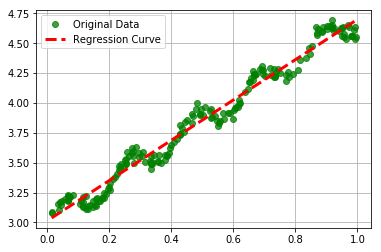

In [5]:
#绘制权值
X=[]
Y=[]
for d in data:
    X.append(d[0])
    Y.append(d[1])
plt.plot(X,Y,'go',label='Original Data',alpha=0.75)#alpha透明度
plt.grid(True)
x=[min(X),max(X)]
y=[w[0]*x[0]+w[1],w[0]*x[1]+w[1]]
plt.plot(x,y,'r--',linewidth=3,label='Regression Curve')
plt.legend(loc='upper left')

（2）看成矩阵用numpy

Python 并没有提供数组功能，虽然列表 (list) 可以完成基本的数组功能，但它并不是真正的数组，而且在数据量较大时，使用列表的速度就会慢。
Numpy 提供了真正的数组功能，以及对数据快速处理的函数。
Numpy 还是很多更高级的扩展库的依赖库，例如： Scipy，Matplotlib，Pandas等。

In [3]:
filedata=open('G:\\代码\\新建文件夹\\回归代码\\data.txt')
data=[]
for line in filedata:
    d=list(map(float,line.split('\t')))
    data.append(d)
filedata.close()

In [5]:
import numpy as np
dataSet=np.array(data)
m,n=np.shape(dataSet)
X=np.ones((m,n))
X[:,:-1]=dataSet[:,:-1]
y=dataSet[:,-1]
w=np.zeros(n)
alpha=0.001
times=0
while times<100000:
    g=np.dot(X.T,(np.dot(X,w)-y))
    wNew=w-alpha*g
    if (abs(wNew-w)<0.00001).all():
        break
    else:
        w=wNew            
    times+=1   
print(w)   

[1.69459667 3.00812361]


#### 方法二：最小二乘法

In [2]:
filedata=open('G:\\代码\\新建文件夹\\回归代码\\data.txt')
data=[]
for line in filedata:
    d=list(map(float,line.split('\t')))
    data.append(d)
filedata.close()

In [64]:
import numpy as np
dataSet=np.array(data)
m,n=np.shape(dataSet)
X=np.ones((m,n))
X[:,:-1]=dataSet[:,:-1]
y=dataSet[:,-1]
np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

array([1.69532264, 3.00774324])

#### sklearn

In [6]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
X=[[10],[15],[20],[30],[50],[60],[70]]
y=[0.8,1,1.8,2,3.2,3,3.5]
reg.fit(X,y)
w=reg.coef_
b=reg.intercept_
print('w=',w)
print('b=',b)
print('预测值：',reg.predict(55))

w= [0.04396146]
b= 0.5842612419700215
预测值： [3.00214133]


In [73]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target
model = LinearRegression()
#选择线性回归模型(初始化线性回归模型)
model.fit(data_X,data_y)
#进行模型的训练
print(model.predict(data_X[:4,:]))#预测值
print(data_y[:4])#真实值

[30.00821269 25.0298606  30.5702317  28.60814055]
[24.  21.6 34.7 33.4]


### 线性回归：房价预测案例

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### （1） 查看数据

In [116]:
data=pd.read_csv('F:\\BaiduNetdiskDownload\\sndHsPra.csv')
data.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850.0
1,chaoyang,1,1,59.09,middle,1,0,46540.0
2,haidian,5,2,278.95,high,1,1,71662.0
3,haidian,3,2,207.00,high,1,1,57972.0
4,fengtai,2,1,53.32,low,1,1,71268.0


In [29]:
data.shape

(16210, 8)

In [30]:
data.dtypes

dist        object
roomnum      int64
halls        int64
AREA       float64
floor       object
subway       int64
school       int64
price      float64
dtype: object

In [118]:
dict1={u'chaoyang':'朝阳',u'fengtai':'丰台',u'haidian':'海淀',u'shijingshan':'石景山',u'xicheng':'西城',u'dongcheng':'东城'}
data.dist=data.dist.apply(lambda x:dict1[x])
data.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,朝阳,1,0,46.06,middle,1,0,48850.0
1,朝阳,1,1,59.09,middle,1,0,46540.0
2,海淀,5,2,278.95,high,1,1,71662.0
3,海淀,3,2,207.00,high,1,1,57972.0
4,丰台,2,1,53.32,low,1,1,71268.0


##### 查看目标变量的分布

Text(0,0.5,'频数')

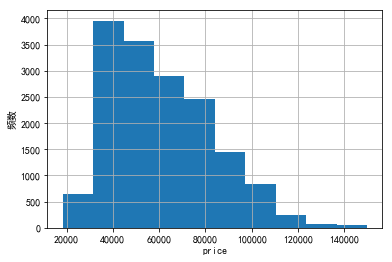

In [32]:
plt.rcParams['font.sans-serif']=['SimHei']
data.price.hist()
plt.xlabel('price')
plt.ylabel('频数')

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

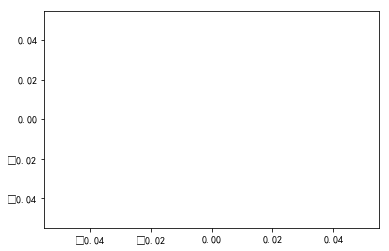

In [100]:
sns.distplot(data['price'])#因变量的分布

#### （2） 描述性统计

In [117]:
data.describe()

,roomnum,halls,AREA,subway,school,price
count,16210.000000,16210.000000,16210.000000,16210.000000,16210.000000,16193.000000
mean,2.166194,1.221407,91.746598,0.827822,0.303085,61153.858643
std,0.809907,0.532048,44.000768,0.377546,0.459606,22301.263088
min,1.000000,0.000000,30.060000,0.000000,0.000000,18348.000000
25%,2.000000,1.000000,60.000000,1.000000,0.000000,42793.000000
50%,2.000000,1.000000,78.830000,1.000000,0.000000,57464.000000
75%,3.000000,2.000000,110.517500,1.000000,1.000000,76120.000000
max,5.000000,3.000000,299.000000,1.000000,1.000000,149871.000000


In [34]:
data['price'].describe()

count     16193.000000
mean      61153.858643
std       22301.263088
min       18348.000000
25%       42793.000000
50%       57464.000000
75%       76120.000000
max      149871.000000
Name: price, dtype: float64

In [35]:
data.price=data.price/10000
data.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,朝阳,1,0,46.06,middle,1,0,4.8850
1,朝阳,1,1,59.09,middle,1,0,4.6540
2,海淀,5,2,278.95,high,1,1,7.1662
3,海淀,3,2,207.00,high,1,1,5.7972
4,丰台,2,1,53.32,low,1,1,7.1268


In [36]:
#7个自变量
for i in range(7):
    if i!=3:
        print(data.columns.values[i],':')
        print(data[data.columns.values[i]].agg(['value_counts']).T)
        print('='*70)
print('AREA:')
print(data.AREA.agg(['min','max','median','mean','std']))     

dist :
                丰台    海淀    朝阳    东城    西城   石景山
value_counts  2947  2919  2864  2783  2750  1947
roomnum :
                 2     3     1    4    5
value_counts  7971  4250  3212  675  102
halls :
                  1     2    0   3
value_counts  11082  4231  812  85
floor :
              middle  high   low
value_counts    5577  5549  5077
subway :
                  1     0
value_counts  13419  2791
school :
                  0     1
value_counts  11297  4913
AREA:
min        30.060000
max       299.000000
median     78.830000
mean       91.746598
std        44.000768
Name: AREA, dtype: float64


自变量之间的关系

In [90]:
pd.crosstab(data.subway,data.school)

school,0,1
subway,,
0,2378,413
1,8919,4500


丰台     2947
海淀     2919
朝阳     2864
东城     2783
西城     2750
石景山    1947
Name: dist, dtype: int64

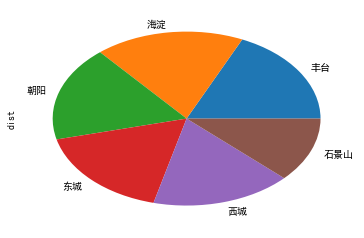

In [37]:
data.dist.value_counts().plot(kind='pie')
data.dist.value_counts()
#data.dist.agg(['value_counts'])

#### （3） 分析相关性，挑选特征

1.dist与price

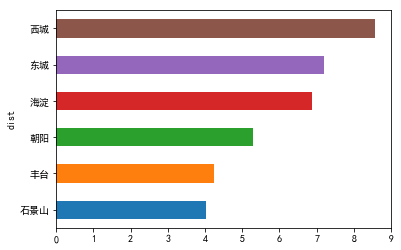

In [98]:
data.price.groupby(data.dist).mean().sort_values(ascending=True).plot(kind='barh')
#data.price.groupby(data.dist).mean().plot(kind='barh')

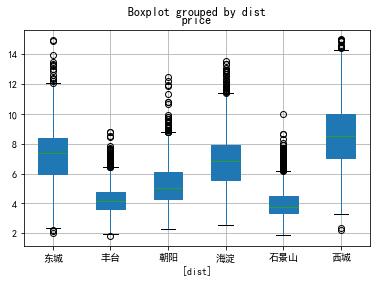

In [99]:
dat1 = data[['dist','price']]
dat1.boxplot(by='dist',patch_artist=True)

2.roomnum与price

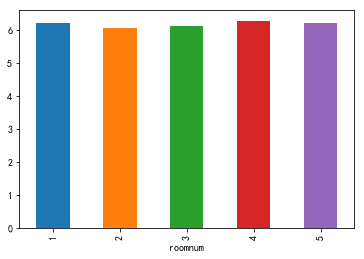

In [105]:
data.price.groupby(data.roomnum).mean().plot(kind='bar')

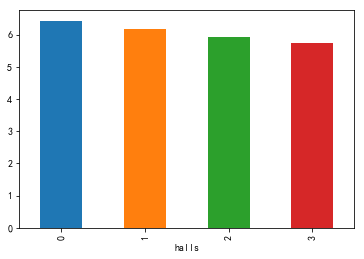

In [104]:
data.price.groupby(data.halls).mean().plot(kind='bar')

3.floor、school、subway与price

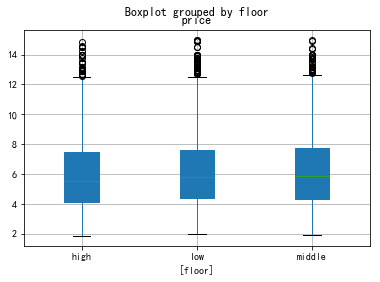

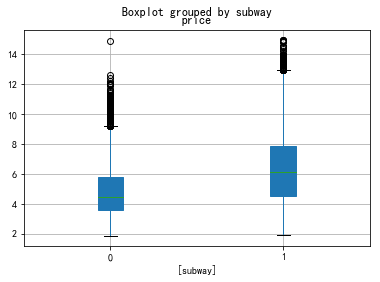

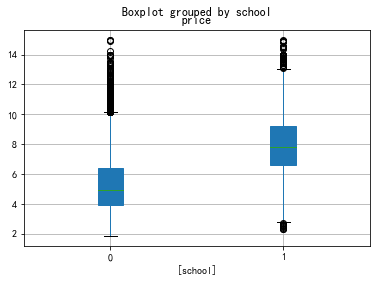

In [97]:
dat2 = data[['floor','price']]
dat3 = data[['subway','price']]
dat4 = data[['school','price']]
dat2.boxplot(by='floor',patch_artist=True)
dat3.boxplot(by='subway',patch_artist=True)
dat4.boxplot(by='school',patch_artist=True)

4.area与price:
都是连续变量，可以求相关系数矩阵

In [95]:
np.corrcoef(data.dropna().price,data.dropna().AREA)

array([[ 1.        , -0.07443643],
       [-0.07443643,  1.        ]])

发现floor和roomnum与price的相关性不大，可以删除

#### （4） 数据处理

缺失值处理,
1.删除缺失值
2.适时可以填充缺失值：data.fillna(data.mean())

In [100]:
'''
#缺失值总数和所占比例
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data[missing_data['total']>1].index

#如果特征包括80%以上有缺失，可以删除
#data.drop(missing_data[missing_data['total']>1].index,axis=1)
#删除指定的行
data1=data.drop(data[data['price'].isnull()].index)
data2=data1.drop(data[data['floor'].isnull()].index)
'''

"\n#缺失值总数和所占比例\ntotal=data.isnull().sum().sort_values(ascending=False)\npercent=(data.isnull().sum()/data.shape[0]).sort_values(ascending=False)\nmissing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])\nmissing_data[missing_data['total']>1].index\n\n#如果特征包括80%以上有缺失，可以删除\n#data.drop(missing_data[missing_data['total']>1].index,axis=1)\n#删除指定的行\ndata1=data.drop(data[data['price'].isnull()].index)\ndata2=data1.drop(data[data['floor'].isnull()].index)\n"

In [101]:
data.isnull().sum()

dist        0
roomnum     0
halls       0
AREA        0
floor       7
subway      0
school      0
price      17
dtype: int64

In [102]:
data1=data.dropna()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,朝阳,1,0,46.06,middle,1,0,4.8850
1,朝阳,1,1,59.09,middle,1,0,4.6540
2,海淀,5,2,278.95,high,1,1,7.1662
3,海淀,3,2,207.00,high,1,1,5.7972
4,丰台,2,1,53.32,low,1,1,7.1268
5,丰台,2,1,58.00,low,1,1,7.0690
6,海淀,2,1,55.80,low,1,1,5.7348
7,海淀,2,1,58.90,middle,1,1,5.5179
8,海淀,2,1,66.90,middle,1,1,4.5591
9,丰台,2,2,53.00,middle,1,0,7.3585


虚拟变量
m个类别用m-1个虚拟变量

In [107]:
data2=pd.get_dummies(data1[['dist','floor']])
data2.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_石景山,dist_西城,floor_high,floor_low,floor_middle
0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0


In [132]:
data3=data2.drop(['dist_石景山','floor_high'],axis=1)
data3.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_西城,floor_low,floor_middle
0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0


In [133]:
data4=pd.concat([data3,data1[['school','halls','AREA','subway','roomnum','price']]],axis=1)
data4.head()

,dist_东城,dist_丰台,dist_朝阳,dist_海淀,dist_西城,floor_low,floor_middle,school,halls,AREA,subway,roomnum,price
0,0,0,1,0,0,0,1,0,0,46.06,1,1,4.8850
1,0,0,1,0,0,0,1,0,1,59.09,1,1,4.6540
2,0,0,0,1,0,0,0,1,2,278.95,1,5,7.1662
3,0,0,0,1,0,0,0,1,2,207.00,1,3,5.7972
4,0,1,0,0,0,1,0,1,1,53.32,1,2,7.1268


#### （5）建模：回归

In [123]:
from sklearn import linear_model

http://sklearn.apachecn.org/cn/0.19.0/modules/linear_model.html#ordinary-least-squares

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [147]:
data_X = data4[['dist_东城','dist_丰台','dist_朝阳','dist_海淀','dist_西城','floor_low','floor_middle','school','AREA','subway','roomnum','halls']]
data_y = data4['price']
model=linear_model.LinearRegression().fit(data_X,data_y)
model.coef_

array([ 2.48835627,  0.12339087,  0.8381755 ,  2.20053947,  3.74038174,
        0.20175381,  0.15328257,  1.1779812 , -0.00575308,  0.69639499,
        0.10875642,  0.42092965])

In [148]:
model1.intercept_#截距

3.3698760150303593

分开测试集和训练集

In [128]:
from sklearn.model_selection import train_test_split

In [204]:
dat_X = data4[['dist_东城','dist_丰台','dist_朝阳','dist_海淀','dist_西城','school','subway','halls']]
dat_y = data4['price']
X_train,X_test,y_train, y_test = train_test_split(dat_X,dat_y, test_size=0.3,random_state=42)
model2=linear_model.LinearRegression().fit(X_train,y_train)
model2.coef_

array([2.40826691, 0.0991459 , 0.81788739, 2.17919805, 3.73474854,
       1.18703992, 0.72822453, 0.17608863])

In [205]:
model2.intercept_

3.3396915653589963

In [206]:
model2.score(X_train,y_train)

0.5920943106454093

In [216]:
y_predict=model2.predict(X_test)
print(y_predict)
print(np.array(y_test))

[7.97875326 8.01540019 5.06189211 ... 5.06189211 3.6149261  8.98970455]
[ 9.4787  8.5127  3.7262 ...  4.6476  4.0541 11.0095]


### 最小二乘和梯度下降法比较

In [72]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split

#### （1）加载数据,切分训练集和测试集

In [76]:
data = datasets.load_boston()
x=data.data
y=data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [99]:
import numpy as np
print(np.max(data.target))
print(np.min(data.target))
print(np.mean(data.target))

50.0
5.0
22.532806324110677


#### （2）标准化数据

https://blog.csdn.net/xy9476/article/details/80209942

In [100]:
from sklearn.preprocessing import StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [101]:
s1=StandardScaler()
x_train=s1.fit_transform(x_train)
x_test=s1.transform(x_test)

s2=StandardScaler()
y_train=s2.fit_transform(y_train.reshape(-1,1))
y_test=s2.transform(y_test.reshape(-1,1))

#### （3）使用两种方法训练和预测

In [106]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

1.最小二乘

In [107]:
model=LinearRegression()
model.fit(x_train, y_train)
model_predict=model.predict(x_test)

In [108]:
print(model.fit(x_train, y_train).coef_)
print(model.fit(x_train, y_train).intercept_)

[[-0.11286566  0.1306885   0.01207992  0.09054443 -0.17880511  0.31821979
  -0.01744478 -0.33320158  0.26716638 -0.21737875 -0.20384674  0.05662515
  -0.40794066]]
[5.46047518e-15]


2.SGD预测

In [109]:
model2=SGDRegressor()
model2.fit(x_train,y_train)
model2_predict=model2.predict(x_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
print(model2.fit(x_train, y_train).coef_)
print(model2.fit(x_train, y_train).intercept_)

[-0.08817662  0.06226501 -0.04006628  0.10064286 -0.07100929  0.37108457
 -0.01856496 -0.20579798  0.08734913 -0.05197784 -0.1894589   0.04992924
 -0.37377372]
[-0.0020807]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### (4)模型评估

默认评估值、R2值、均方误差、平均绝对误差

In [111]:
print(model.score(x_test,y_test))
print(r2_score(y_test,model_predict))
print(mean_squared_error(s2.inverse_transform(y_test),s2.inverse_transform(model_predict)))
print(mean_absolute_error(s2.inverse_transform(y_test),s2.inverse_transform(model_predict)))

0.6763403830998702
0.6763403830998702
25.096985692067715
3.5261239963985425


In [112]:
print(model2.score(x_test, y_test))
print(r2_score(y_test,model2_predict))
print(mean_squared_error(s2.inverse_transform(y_test),s2.inverse_transform(model2_predict)))
print(mean_absolute_error(s2.inverse_transform(y_test),s2.inverse_transform(model2_predict)))

0.6575141487774372
0.6547149949513893
26.77384628451941
3.519034410834709


### 注意点

#### 爬下来数据处理问题

In [ ]:
dfa=pd.read_csv('C:\\Users\\Administrator\\Desktop\\sn.csv')
dfa['AREA']=dfa['AREA'].apply(lambda x:x.replace('平米',''))
dfa['AREA']=dfa['AREA'].str.split('-').apply()
dfa['AREA']=dfa['AREA'].apply(lambda x:float(x[0]))
dfa[['室','厅','卫']]=dfa['roomnum'].str.extract('(\d+)室(\d+)厅(\d+)卫')
del dfa['roomnum']